# <font color='744fdb' size=6> **Метод главных компонент (principal component analysis, PCA)**


In [1]:
import numpy as np

from sklearn.decomposition import PCA

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
x = np.arange(1,21)
y = 2 * x + np.random.randn(20)*2

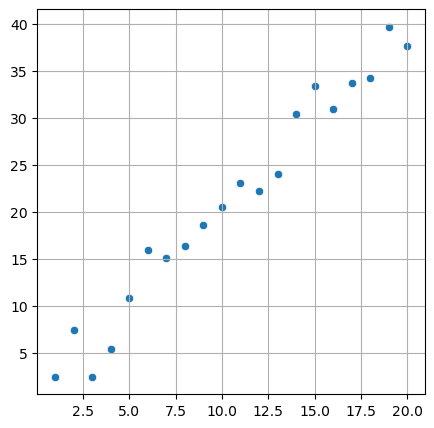

In [3]:
plt.figure(figsize=(5,5))
sns.scatterplot(x=x, y=y)
plt.grid(True)
plt.show()

In [4]:
# центрируем
x_centr = x - x.mean()
y_centr = y - y.mean()

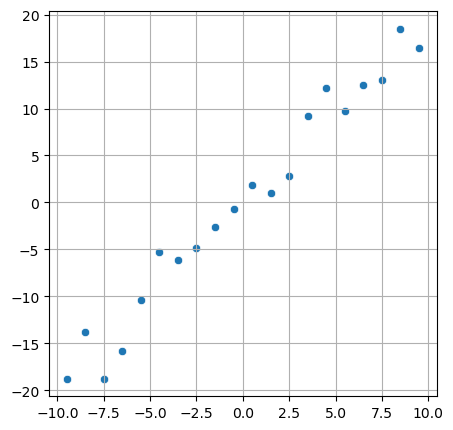

In [5]:
plt.figure(figsize=(5,5))
sns.scatterplot(x=x_centr, y=y_centr)
plt.grid(True)
plt.show()

Ковариационная матрица - это матрица, у которой $ (i,j) $-элемент является корреляцией признаков $(X_i, X_j)$. Вспомним формулу ковариации:
$$
Cov(X_i, X_j) = E \left[ (X_i - E(X_i)) \cdot (X_j - E(X_j)) \right] = E(X_i X_j) - E(X_i) \cdot E(X_j)
$$

В нашем случае она упрощается, так как $E(X_i) = E(X_j) = 0$:
$$
Cov(X_i, X_j) = E(X_i X_j)
$$

Заметим, что когда $X_i = X_j$:
$$
Cov(X_i, X_i) = Var(X_i)
$$

и это справедливо для любых случайных величин.


Замечание: Ковариационная матрица является обобщением дисперсии на случай многомерных случайных величин – она так же описывает форму (разброс) случайной величины, как и дисперсия.

Мат. ожидание - это центр тяжести величины (положение сл. величины)

Дисперсия - размеры величины (размер или разброс сл. величины)

In [6]:
X_centr = np.vstack((x_centr, y_centr))

In [7]:
covmat = np.cov(X_centr)

In [8]:
covmat

array([[ 35.        ,  68.40478571],
       [ 68.40478571, 138.15856966]])

Найдем вектор, при котором максимизировался бы  размер (дисперсия) проекции нашей выборки на него

Рассмотрим выборку данных $X$ и вектор направления $w$. Проекция данных $X$ на $w$ определяется как $Xw$. Нам нужно максимизировать дисперсию этой проекции, которая вычисляется как:
$$
\text{Var}(Xw) = w^T Q w
$$

Для нахождения $w$, которое максимизирует дисперсию, необходимо нормировать $w$ так, чтобы $w^T w = 1$.

Формулируем задачу оптимизации:
$$
\max_{w} \, w^T Q w \quad \text{при условии} \quad w^T w = 1
$$

Для решения этой задачи используем метод Лагранжа. Записываем лагранжиан:
$$
L(w, \lambda) = w^T Q w - \lambda (w^T w - 1)
$$

Находим производные по $w$ и $\lambda$ и приравниваем их к нулю:
$$
\frac{\partial L}{\partial w} = 2Q w - 2\lambda w = 0
$$
$$
Q w = \lambda w
$$

Это и есть определение собственного вектора и собственного значения.

Собственные значения $\lambda$ представляют дисперсии вдоль направлений, определяемых соответствующими собственными векторами. Для максимизации дисперсии нужно выбрать вектор, соответствующий наибольшему собственному значению.


Таким образом, направление максимальной дисперсии у проекции всегда совпадает с собственным вектором, имеющим максимальное собственное значение.

###Пример расчета собственнх значений



Предположим, у нас есть ковариационная матрица:
$$
Q = \begin{pmatrix}
4 & 2 \\
2 & 3
\end{pmatrix}
$$

Найдём собственные значения и векторы:

1. Решаем характеристическое уравнение:
$$
\det(Q - \lambda I) = 0
$$

$$
\begin{vmatrix}
4 - \lambda & 2 \\
2 & 3 - \lambda
\end{vmatrix} = 0
$$
$$
(4 - \lambda)(3 - \lambda) - 4 = \lambda^2 - 7\lambda + 8 = 0
$$
Собственные значения: $\lambda_1 = \frac{1+\sqrt{17}}{2}$, $\lambda_2 = \frac{1-\sqrt{17}}{2}$.


### Собственные вектора и продолжение работы с методом

Функция `np.linalg.eig` из библиотеки NumPy вычисляет собственные значения и собственные векторы квадратной матрицы.

In [9]:
X_centr

array([[ -9.5       ,  -8.5       ,  -7.5       ,  -6.5       ,
         -5.5       ,  -4.5       ,  -3.5       ,  -2.5       ,
         -1.5       ,  -0.5       ,   0.5       ,   1.5       ,
          2.5       ,   3.5       ,   4.5       ,   5.5       ,
          6.5       ,   7.5       ,   8.5       ,   9.5       ],
       [-18.78367527, -13.77284844, -18.75733308, -15.79416379,
        -10.44454477,  -5.26793451,  -6.10065298,  -4.87716683,
         -2.6271823 ,  -0.74776716,   1.87567107,   1.05306014,
          2.79586529,   9.16369931,  12.13915522,   9.69305076,
         12.49619405,  13.00569206,  18.49515985,  16.45572138]])

In [10]:
a, vecs = np.linalg.eig(covmat) # собственные вектора

In [11]:
a

array([  0.90760146, 172.2509682 ])

In [12]:
vecs

array([[-0.89500211, -0.4460619 ],
       [ 0.4460619 , -0.89500211]])

In [13]:
vecs[1,1]

np.float64(-0.8950021123149264)

In [14]:
X_centr[1]

array([-18.78367527, -13.77284844, -18.75733308, -15.79416379,
       -10.44454477,  -5.26793451,  -6.10065298,  -4.87716683,
        -2.6271823 ,  -0.74776716,   1.87567107,   1.05306014,
         2.79586529,   9.16369931,  12.13915522,   9.69305076,
        12.49619405,  13.00569206,  18.49515985,  16.45572138])

In [15]:
X_centr[0]

array([-9.5, -8.5, -7.5, -6.5, -5.5, -4.5, -3.5, -2.5, -1.5, -0.5,  0.5,
        1.5,  2.5,  3.5,  4.5,  5.5,  6.5,  7.5,  8.5,  9.5])

In [16]:
X_centr[0] * vecs[0,1] + X_centr[1] * vecs[1,1]

array([ 21.04901709,  16.1182546 ,  20.13331698,  17.03521231,
        11.80123009,   6.72209107,   7.02131395,   5.48022937,
         3.02042656,   0.89228414,  -1.90176052,  -1.6115839 ,
        -3.61746009,  -9.76274689, -12.87184811, -11.12864136,
       -14.08352243, -14.98558612, -20.34473329, -18.96549345])

In [17]:
_, vecs = np.linalg.eig(covmat)
v = -vecs[:,1]
Xnew = np.dot(v,X_centr)

In [18]:
X_centr

array([[ -9.5       ,  -8.5       ,  -7.5       ,  -6.5       ,
         -5.5       ,  -4.5       ,  -3.5       ,  -2.5       ,
         -1.5       ,  -0.5       ,   0.5       ,   1.5       ,
          2.5       ,   3.5       ,   4.5       ,   5.5       ,
          6.5       ,   7.5       ,   8.5       ,   9.5       ],
       [-18.78367527, -13.77284844, -18.75733308, -15.79416379,
        -10.44454477,  -5.26793451,  -6.10065298,  -4.87716683,
         -2.6271823 ,  -0.74776716,   1.87567107,   1.05306014,
          2.79586529,   9.16369931,  12.13915522,   9.69305076,
         12.49619405,  13.00569206,  18.49515985,  16.45572138]])

In [19]:
Xnew

array([-21.04901709, -16.1182546 , -20.13331698, -17.03521231,
       -11.80123009,  -6.72209107,  -7.02131395,  -5.48022937,
        -3.02042656,  -0.89228414,   1.90176052,   1.6115839 ,
         3.61746009,   9.76274689,  12.87184811,  11.12864136,
        14.08352243,  14.98558612,  20.34473329,  18.96549345])

### Найдем через библиотеку

In [36]:
#PCA?

In [40]:
from sklearn.decomposition import PCA
pca = PCA(n_components = 1)
XPCAreduced = pca.fit_transform(X_centr.T)

In [45]:
X_centr

array([[ -9.5       ,  -8.5       ,  -7.5       ,  -6.5       ,
         -5.5       ,  -4.5       ,  -3.5       ,  -2.5       ,
         -1.5       ,  -0.5       ,   0.5       ,   1.5       ,
          2.5       ,   3.5       ,   4.5       ,   5.5       ,
          6.5       ,   7.5       ,   8.5       ,   9.5       ],
       [-18.78367527, -13.77284844, -18.75733308, -15.79416379,
        -10.44454477,  -5.26793451,  -6.10065298,  -4.87716683,
         -2.6271823 ,  -0.74776716,   1.87567107,   1.05306014,
          2.79586529,   9.16369931,  12.13915522,   9.69305076,
         12.49619405,  13.00569206,  18.49515985,  16.45572138]])

In [41]:
Xnew

array([-21.04901709, -16.1182546 , -20.13331698, -17.03521231,
       -11.80123009,  -6.72209107,  -7.02131395,  -5.48022937,
        -3.02042656,  -0.89228414,   1.90176052,   1.6115839 ,
         3.61746009,   9.76274689,  12.87184811,  11.12864136,
        14.08352243,  14.98558612,  20.34473329,  18.96549345])

In [42]:
XPCAreduced

array([[-21.04901709],
       [-16.1182546 ],
       [-20.13331698],
       [-17.03521231],
       [-11.80123009],
       [ -6.72209107],
       [ -7.02131395],
       [ -5.48022937],
       [ -3.02042656],
       [ -0.89228414],
       [  1.90176052],
       [  1.6115839 ],
       [  3.61746009],
       [  9.76274689],
       [ 12.87184811],
       [ 11.12864136],
       [ 14.08352243],
       [ 14.98558612],
       [ 20.34473329],
       [ 18.96549345]])

In [43]:
pca

PCA(n_components=1)

In [44]:
pca.explained_variance_ratio_

array([0.99475855])

### Пример применения для графиков

In [25]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA, KernelPCA

In [37]:
#KernelPCA?

In [27]:
# Создание набора данных с размерностью 10
np.random.seed(42)
data = np.random.rand(100, 10)  # 100 образцов с 10 признаками

In [28]:
import pandas as pd

In [29]:
pd.DataFrame(data)

,0,1,2,3,4,5,6,7,8,9
0,0.374540,0.950714,0.731994,0.598658,0.156019,0.155995,0.058084,0.866176,0.601115,0.708073
1,0.020584,0.969910,0.832443,0.212339,0.181825,0.183405,0.304242,0.524756,0.431945,0.291229
2,0.611853,0.139494,0.292145,0.366362,0.456070,0.785176,0.199674,0.514234,0.592415,0.046450
3,0.607545,0.170524,0.065052,0.948886,0.965632,0.808397,0.304614,0.097672,0.684233,0.440152
4,0.122038,0.495177,0.034389,0.909320,0.258780,0.662522,0.311711,0.520068,0.546710,0.184854
...,...,...,...,...,...,...,...,...,...,...
95,0.600517,0.665037,0.175371,0.914412,0.418771,0.383139,0.518918,0.046966,0.166283,0.738034
96,0.082799,0.603152,0.245349,0.389296,0.288694,0.355673,0.719046,0.297122,0.566405,0.476050
97,0.663671,0.936830,0.732572,0.214940,0.031183,0.262264,0.595078,0.051426,0.496366,0.596843
98,0.334244,0.770912,0.106598,0.075138,0.728189,0.495491,0.688402,0.434827,0.246402,0.819102


In [30]:
# Применение PCA для снижения размерности до 2
pca = PCA(n_components=2)
reduced_data = pca.fit_transform(data)

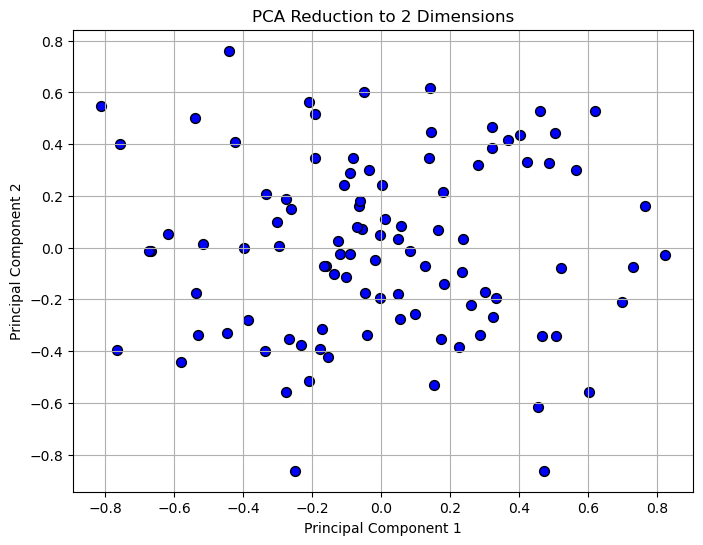

In [31]:
# Построение графика
plt.figure(figsize=(8, 6))
plt.scatter(reduced_data[:, 0], reduced_data[:, 1], c='blue', edgecolor='k', s=50)
plt.title('PCA Reduction to 2 Dimensions')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.grid(True)
plt.show()


In [32]:
# Расчет сохраненной и потерянной дисперсии
explained_variance_ratio = pca.explained_variance_ratio_
total_explained_variance = np.sum(explained_variance_ratio)
lost_variance = 1 - total_explained_variance

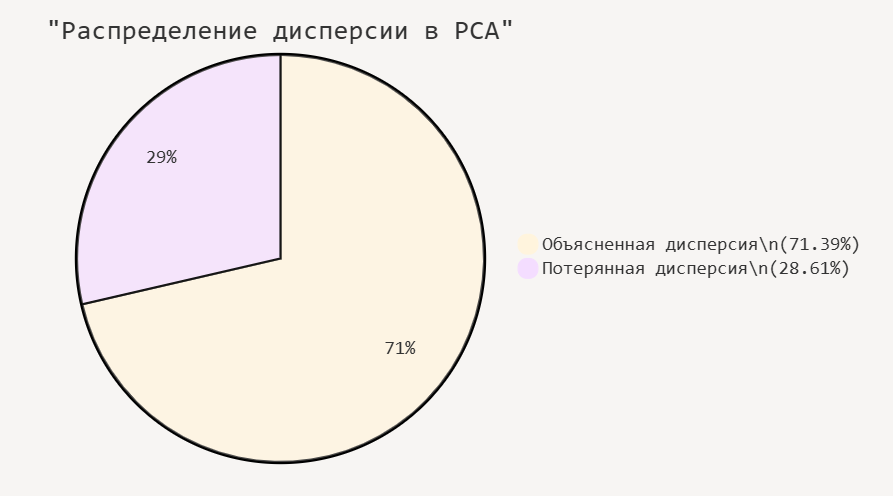

In [33]:
explained_variance_ratio

array([0.16110575, 0.13898059])

In [34]:
total_explained_variance

np.float64(0.3000863461120907)

In [35]:
lost_variance

np.float64(0.6999136538879094)

**Текущая ситуация:**

Два компонента объясняют около 71.39% вариации данных

Оставшиеся 28.61% информации теряются при уменьшении размерности

Первый компонент объясняет больше вариации (37.74%), чем второй (33.65%)

**Рекомендации:**

Если потеря 28.61% информации критична для вашей задачи, рассмотрите возможность использования дополнительных компонентов

Если двухмерное представление достаточно для анализа, текущее решение сохраняет основную структуру данных

При необходимости визуализации данных двухкомпонентное представление будет отражать около 71% информации о вариации данных